In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score

In this week's exercise we explore the clustering method k-Means. First, the simplicity of implementing k-Means is shown, then different initialization techniques are compared.

## 1 The k-Means algorithm

Implement the two parts of the algorithm: cluster assignment and mean calculation.

**\_update\_clusters**
- As parameters, the function gets a DataFrame ($n \times d$) containing the dataset ($n$ samples with $d$ dimensions), and a DataFrame ($k \times d$) containing the $k$ mean vectors
- It returns an array of length $n$, containing a cluster label for each sample (row) of the data set 

**\_update\_means**
- This function gets the DataFrame ($n \times d$) containing the dataset as well as an array of length $n$ containing the cluster label of each sample as parameters
- It returns a DataFrame of size $k \times d$ with the $k$ updated mean vectors 

<br>
Some Hints:
<ul>
<li><a href=https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.distance.cdist.html>scipy.spatial.distance.cdist</a></li>
<li><a href=https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmin.html>numpy.argmin</a></li>
<li><a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html>pandas.DataFrame.groupby</a></li>
</ul>

Feel free to add import statements! 

In [13]:
# Implement _update_clusters and _update_means
def myKMeans(data, k, iterations):
    means = _init_means(data, k)
    clusters = _update_clusters(data, means)

    for i in range(iterations):
        means = _update_means(data, clusters)
        clusters = _update_clusters(data, means)

    return clusters


def _init_means(data, k):
    min_values = data.min()
    max_values = data.max()
    means = np.random.uniform(min_values, max_values, (k, data.shape[1]))
    return means


def _update_clusters(data, means):
    # Implement _update_clusters
    ##will create an array which will contain n empty arrays, 
    clusters = [[] for _ in range(noClstr)]        ##will give us the index of the closest centroid (euclidean distance)

    centroids = means
    
    for pointIndex, point in enumerate(data):
        ##will give us the index of the closest centroid (euclidean distance)
        closestCentroid = np.argmin(np.sqrt( np.sum((point - centroids)**2, axis=1)))
        
        ##will assign the sampleRow to that clusters
        clusters[closestCentroid].append(pointIndex)       
              
    return clusters
    


def _update_means(data, clusters):
    # Implement _update_means
    
    centroids = np.zeros((noClstr, dataColumn))##no of cluster, columns| also if u change the no of cluster to n, change the no of cluster to n
    
    for idx, cluster in enumerate(clusters):        
        newCentroid = np.mean(data[cluster], axis=0) ## data[cluster], here cluster was the index of array, so we need to calculate the mean of those index, which are available in our data
        centroids[idx] = newCentroid
        
    return centroids



##Custom functions

def set_no_cluster(number):
    global noClstr
    noClstr = number
    
def get_no_cluster():
    return noClstr

def set_get_no_column(number):
    global dataColumn
    dataColumn = number
    
    return dataColumn


def set_get_no_rows(number):
    global dataRows
    dataRows = number
    
    return dataRows

def set_get_no_iterations(number):
    global totalIterations
    totalIterations = number
    
    return totalIterations

    

def predict_cluster(clusters, data, totalRows):
    yPred = np.zeros(totalRows)
    
    #all cluster
    for clusterIdx, cluster in enumerate(clusters):
        
        #inside single cluster
        for sampleIdx in cluster:
            yPred[sampleIdx] = clusterIdx
        
    return yPred


  
def plot_fig(data, classLabel):
    plt.scatter(data[:, 0], data[:,1], c=classLabel, cmap=plt.cm.Spectral)
    plt.show()
    
    
    
def scale_and_convert_df(newDf):
    ##scaling dataset
    mms = MinMaxScaler()
    mms.fit(newDf)
    dataTransformed = mms.transform(newDf)

    ##Convert to Dataframe
    dataTransformed = pd.DataFrame(dataTransformed, columns=['mentality_interceptions', 'power_long_shots'] )
    
    return dataTransformed


def implementingElbowForK(data):
    SSE = []
    K = range(1,10)
    
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        SSE.append(km.inertia_)
        
    ##plot Elbow
    plt.plot(K, SSE, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Optimal K (Elbow Plot)')
    plt.show()

    
    
    
def calcSilhouetteScore(data, samples):
    
    K = range(1,10)
    

    kmeansPerK = [KMeans(n_clusters = k, random_state=42).fit(data) for k in range(1,10)]
    
    silScores = [
        silhouette_score(data, model.labels_)
        for model in kmeansPerK[1:]
    ]
    
    xAxis = []
    for i in range(2,10):
        xAxis.append(i)
    
    print(silScores)

    plt.plot(xAxis, silScores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sill Score')
    plt.title('Silhouette Method')
    plt.show()
    



Test your implementation by clustering the features ``mentality_interceptions`` and ``power_long_shots``. <br>
Try different values for $k$ and visualize the results. Which $k$ seems to produce the best result?  
Also calculate the [Silhouette Coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Does it confirm your intuition?

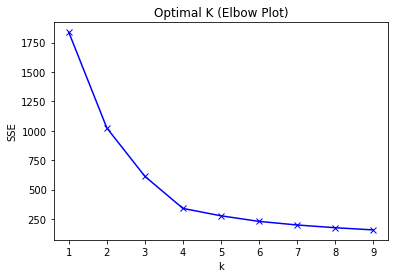

[0.4371606163931137, 0.48532658130981476, 0.5103817303773764, 0.46251870203685846, 0.41785263564366776, 0.4039122792183276, 0.40645724937599464, 0.3870682715089835]


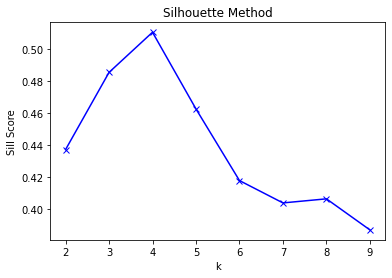

If we compare Silhouette score graph with our Elbow plot we can see that the maximum peak is 4 and also from the elbow plot we can find that optimal point is 4. So I am taking 4 clusters


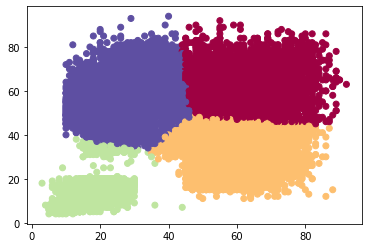

In [14]:
# Use your k-Means implementation and visualize the results. Print the silhouette score.
csv = pd.read_csv('data/fifa_20.csv')

df = csv.copy(deep=False)
df = df[['mentality_interceptions','power_long_shots']]
newDf = df[(df['mentality_interceptions'].notna())]
newDf = df[(df['power_long_shots'].notna())]
noOfRows = set_get_no_rows(newDf.shape[0])
noOfCol = set_get_no_column(newDf.shape[1])

##scalling the dataset
dataTransformed = scale_and_convert_df(newDf)

##Implementing Elbow
implementingElbowForK(dataTransformed)

#SilhouetteScore
calcSilhouetteScore(dataTransformed, noOfRows)
    
print('If we compare Silhouette score graph with our Elbow plot we can see that the maximum peak is 4 and also from the elbow plot we can find that optimal point is 4. So I am taking 4 clusters')
    
##from the elbow and Sil we get that optimum k is 4
set_no_cluster(4)

noOfIterations = set_get_no_iterations(10)

np.random.seed(0)
Df = newDf.values

##get the clusters
kMeans = myKMeans(Df, get_no_cluster(), noOfIterations)

#set clusterLabel
yPred = predict_cluster(kMeans, Df, noOfRows)

plot_fig(Df, yPred)



## 2 Different initializations of k-Means

Take a look at the influence of different initializations of the k-Means algorithm. For this purpose, compare random initialization with the [*k-means++* initialization algorithm](https://en.wikipedia.org/wiki/K-means%2B%2B). Use the [sklearn implementation of k-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and run the algorithm with: 
- `1, 2, 3, 4, 5, 10, 20` as the maximum number of iterations (`max_iter`)
- `10` initializations each (`n_init`)
- and a convergence tolerance of `0` (`tol`).

For both initialization methods, plot the final value of the objective function (`inertia_`) against the number of iterations in line plots of different colors.

What do you observe?

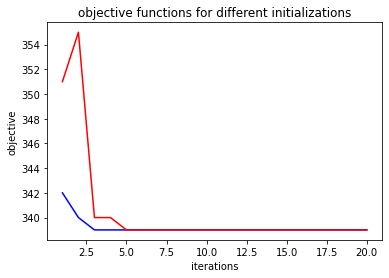

In [21]:
# Use the sklearn implementation of k-Means and plot the objective function for both initialization methods.

iterations = [1, 2, 3, 4, 5, 10, 20]

objective = pd.Series(data=0, index=iterations)
objective_pp = pd.Series(data=0, index=iterations)

for i in iterations:
    # Add code here
    km = KMeans(n_clusters=4,  init='k-means++', n_init=10, max_iter=i, tol=0)
    km = km.fit(dataTransformed)
    objective[i] = km.inertia_
    
    km = KMeans(n_clusters=4,  init='random', n_init=10, max_iter=i, tol=0)
    km = km.fit(dataTransformed)
    objective_pp[i] = km.inertia_
    
# print(objective)
    
plt.plot(objective.index, objective, 'b-')
plt.plot(objective_pp.index, objective_pp, 'r-')
plt.title('objective functions for different initializations')
plt.xlabel('iterations')
plt.ylabel('objective')
plt.show()